Realizando uma análise dos dados

In [ ]:
pip install pandas numpy matplotlib scipy seaborn


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#bibliotecas'

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\deise\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, norm, binom

In [22]:
df = pd.read_csv('populacao_brasileira.csv')
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.tail(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
990,990,TO,60,Fundamental,Intermediário,2511.15,M
991,991,RO,20,Superior,Avançado,1880.38,F
992,992,DF,50,Pós-graduação,Básico,3140.89,F
993,993,RS,23,Superior,Avançado,1231.56,M
994,994,DF,27,Pós-graduação,Avançado,3323.17,F
995,995,AC,22,Médio,Básico,2852.40,F
996,996,PE,40,Fundamental,Básico,2533.96,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,998,RS,61,Fundamental,Avançado,3513.60,F
999,999,MG,19,Superior,Intermediário,2467.30,F


In [ ]:
df.dtypes

Unnamed: 0                           int64
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object

In [ ]:
if 'Unnamed: 0' in df.columns: 
    df.rename(columns={'Unnamed: 0': 'Individuo'}, inplace=True)

if 'Individuo' in df.columns:  
    df = df.set_index('Individuo')
else:
    print("A coluna 'Individuo' não foi encontrada no DataFrame.")
    
df.head(10)

A coluna 'Individuo' não foi encontrada no DataFrame.


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
Individuo,,,,,,
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
5,AM,38,Fundamental,Avançado,4441.57,F
6,DF,56,Médio,Intermediário,528.36,F
7,DF,36,Superior,Avançado,2203.10,F
8,PI,40,Fundamental,Básico,3577.07,F


Você é uma pesquisadora desenvolvendo uma análise sobre as características
 da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

 1. 
Considere pessoas fluentes em inglês, qual a probabilidade
 complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
 aleatória e ela não ser fluente em inglês. Considere fluente quem tem o
 nível avançado.

In [95]:
#Niveis de proficiencia em ingles
valores_unicos = df['nível de proficiência em inglês'].unique()
print(valores_unicos)

['Intermediário' 'Básico' 'Avançado']


In [96]:
#Total de pessoas e quantidade fluentes
total_pessoas = len(df)
df_fluentes = len(df[df['nível de proficiência em inglês'] == 'Avançado'])

# Probabilidade
prob_fluente = df_fluentes / total_pessoas

# Probabilidade complementar
prob_nao_fluente = 1 - prob_fluente
print(f"Probabilidade de não ser fluente em inglês: {prob_nao_fluente:.2%}")

Probabilidade de não ser fluente em inglês: 65.60%


 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
 é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [98]:
# Total de pessoas em Alagoas e Pará
pessoas_al_pa = df[(df['estado'] == 'AL') | (df['estado'] == 'PR')]
total_al_pa = len(pessoas_al_pa)

# Pessoas em Alagoas e Pará com renda superior a 5 mil reais
pessoas_renda_alta = pessoas_al_pa[pessoas_al_pa['renda'] > 5000]
total_renda_alta = len(pessoas_renda_alta)

# probabilidade
probabilidade_pessoas_al_e_pr = total_renda_alta / total_al_pa
print(f"Probabilidade de uma pessoa de Alagoas ou do Pará ter renda superior a 5 mil reais: {probabilidade_pessoas_al_e_pr:.2%}")

Probabilidade de uma pessoa de Alagoas ou do Pará ter renda superior a 5 mil reais: 4.29%


 3. Descubra a probabilidade de uma pessoa, residente no estado do
 Amazonas, ter ensino superior completo (considerando apenas a
 escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
 pessoa amazonense que você conversar ter ensino superior completo?

In [ ]:
#Total de pessoas no Amazonas
pessoas_am = df[(df['estado'] == 'AM')]
total_am = len(pessoas_am)

# Pessoas no Amazonas com escolaridade "Superior"
pessoas_ensino_superior = pessoas_am[pessoas_am['escolaridade'] == 'Superior']
total_ensino_superior = len(pessoas_ensino_superior)

#probabilidade
probabilidade_am = total_ensino_superior / total_am
print(f"Probabilidade de uma pessoa de Amazonas ter ensino Superior é de: {probabilidade_am:.2%}")

Probabilidade de uma pessoa de Amazonas ter ensino Superior é de: 23.68%


In [ ]:
#probabilidade geométrica [ P(X = k) = (1 - p)^{k-1} \cdot p ]
k = 5 # Quinta pessoa
prob_quinta_pessoa = ((1 - probabilidade_am) ** (k - 1)) * probabilidade_am
print(f"A probabilidade de a quinta pessoa ter ensino Superior é de: {prob_quinta_pessoa:.2%}")

A probabilidade de a quinta pessoa ter ensino Superior é de: 8.03%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
 que a renda de uma pessoa brasileira está na sua maioria em que faixa
 (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [102]:
#faixas de renda e contar a frequencia
bins = np.arange(0, df['renda'].max() + 1500, 1500)  
frequencia, limites = np.histogram(df['renda'], bins=bins)

#faixa com a maior frequência
indice_moda = np.argmax(frequencia)  
faixa_moda = (limites[indice_moda], limites[indice_moda + 1])
print(f"Faixa de renda com maior frequência: {faixa_moda[0]:.2f} a {faixa_moda[1]:.2f} reais")

#função densidade de probabilidade (PDF)
densidade = frequencia / frequencia.sum()
print("Função densidade de probabilidade (PDF):")
for i in range(len(densidade)):
    print(f"Faixa {limites[i]:.2f} a {limites[i+1]:.2f}: {densidade[i]:.4f}")

Faixa de renda com maior frequência: 3000.00 a 4500.00 reais
Função densidade de probabilidade (PDF):
Faixa 0.00 a 1500.00: 0.0550
Faixa 1500.00 a 3000.00: 0.4140
Faixa 3000.00 a 4500.00: 0.4420
Faixa 4500.00 a 6000.00: 0.0890


5. Calcule a média e a variância da renda da amostra. Depois faça a
 distribuição normal, inclua o gráfico

In [ ]:
# média e a variância da renda
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()
print(f"Média da renda: {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")

Média da renda: 3082.54
Variância da renda: 993156.23


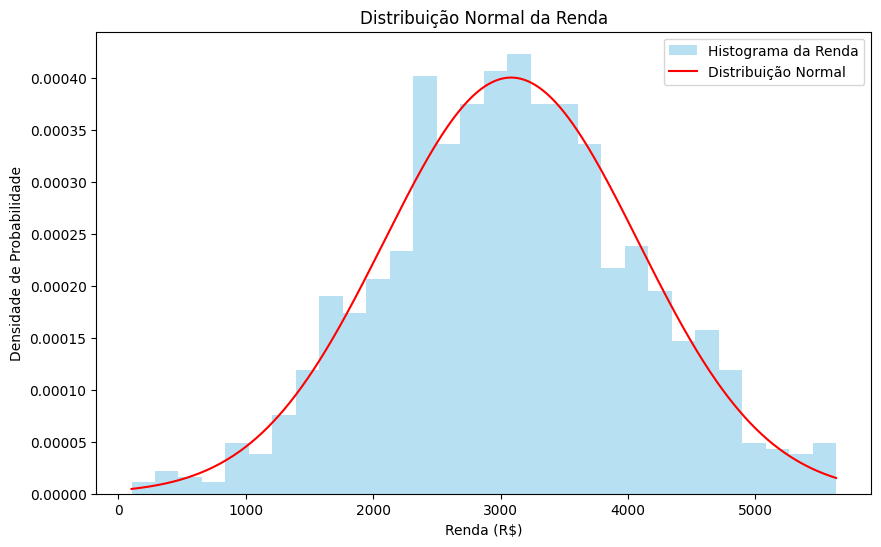

In [105]:
#distribuição normal
x = np.linspace(df['renda'].min(), df['renda'].max(), 1000) 
y = norm.pdf(x, loc=media_renda, scale=np.sqrt(variancia_renda))  # Usar norm.pdf corretamente

# histograma e a distribuição normal
plt.figure(figsize=(10, 6))
plt.hist(df['renda'], bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma da Renda')
plt.plot(x, y, color='red', label='Distribuição Normal')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

 6. Primeiro considere a probabilidade encontrada no nosso conjunto de
 pessoas com escolaridade de pós-graduação. Considerando a amostra de
 população brasileira com 1 milhão de habitantes, qual a probabilidade de
 encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
#probabilidade de uma pessoa ter pós-graduação
pessoas_pos_graduadas = df[(df['escolaridade'] == 'Pós-graduação')]
total_pos_graduadas = len(pessoas_pos_graduadas)
probabilidade_pos_graduacao = total_pos_graduadas / total_pessoas
print(f"Probabilidade de uma pessoa ter Pós-graduação: {probabilidade_pos_graduacao:.2%}")

#distribuição binomial   [ P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k} ]
n = 1000000  #habitantes
k = 243000  #pessoas com pós-graduação
probabilidade = binom.pmf(k, n, probabilidade_pos_graduacao)
print(f"Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: {probabilidade:.8f}")

Probabilidade de uma pessoa ter Pós-graduação: 25.30%
Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: 0.00000000


 7. Somando as densidades nós temos a função de densida de acumulada.
 Considerando a coluna ‘Escolaridade’ faça a função de densidade
 acumulada discreta para cada nível de escolaridade.

In [ ]:
#frequência de cada nível de escolaridade
frequencia = df['escolaridade'].value_counts()

#densidade de probabilidade (PDF)
densidade = frequencia / frequencia.sum()

#densidade acumulada (CDF)
densidade_acumulada = densidade.cumsum()

#dataFrame para exibir os resultados
resultado = pd.DataFrame({'Frequência': frequencia,'Densidade (PDF)': densidade,'Densidade Acumulada (CDF)': densidade_acumulada})
print(resultado)

               Frequência  Densidade (PDF)  Densidade Acumulada (CDF)
escolaridade                                                         
Fundamental           266            0.266                      0.266
Pós-graduação         253            0.253                      0.519
Superior              243            0.243                      0.762
Médio                 238            0.238                      1.000


 8. Qual a margem de erro amostral da proporção populacional
 considerando a proporção de pessoas com nível de inglês intermediário?

In [109]:
#total de pessoas na amostra e  proporção de pessoas com nível de inglês intermediário
n = len(df)
p = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / n
print(f"Proporção de pessoas com nível de inglês intermediário: {p:.2%}")

#margem de erro
z = 1.96 #valor crítico Z para 95% de confiança
margem_erro = z * np.sqrt((p * (1 - p)) / n)
print(f"Margem de erro amostral (95% de confiança): {margem_erro:.2%}")

Proporção de pessoas com nível de inglês intermediário: 32.90%
Margem de erro amostral (95% de confiança): 2.91%


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
 pessoas com uma renda mil reais superior à média?

In [110]:
#média da renda
media_renda = df['renda'].mean()
print(f"Média da renda: {media_renda:.2f}")

#probabilidade usando a distribuição binomial
p = len(df[df['renda'] > (media_renda + 1000)]) / len(df) #proporção de pessoas com renda superior à média + 1000
n = len(df) # total de pessoas na amostra
k = 60 #número de pessoas com renda superior à média + 1000
probabilidade = binom.pmf(k, n, p)
print(f"Proporção de pessoas com renda superior à média + 1000: {p:.2%}")
print(f"Probabilidade de encontrar exatamente 60 pessoas com renda superior à média + 1000: {probabilidade:.8f}")

Média da renda: 3082.54
Proporção de pessoas com renda superior à média + 1000: 16.10%
Probabilidade de encontrar exatamente 60 pessoas com renda superior à média + 1000: 0.00000000


 10. Qual é a probabilidade de escolhermos uma pessoa residente na região
 Sudeste que seja homem, tenha apenas ensino fundamental completo e
 possua renda mensal superior a 2 mil reais?

In [111]:
# Total de pessoas no conjunto de dados e pessoas que atendem às condições
total_pessoas = len(df)
print(f"Total de pessoas no conjunto de dados: {total_pessoas}")

pessoas_filtradas = df[(df['estado'] == 'SU') & (df['sexo'] == 'M') & (df['escolaridade'] == 'Fundamental completo') & (df['renda'] > 2000)]
total_filtradas = len(pessoas_filtradas)
print(f"Total de pessoas que atendem às condições: {total_filtradas}")

#probabilidade
probabilidade = total_filtradas / total_pessoas
print(f"Probabilidade de escolher uma pessoa com essas características: {probabilidade:.2%}")

Total de pessoas no conjunto de dados: 1000
Total de pessoas que atendem às condições: 0
Probabilidade de escolher uma pessoa com essas características: 0.00%
